In [1]:
!pip install kaggle

!mkdir ~/.kaggle

!mv kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
!kaggle datasets download gti-upm/leapgestrecog

Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
100% 2.12G/2.13G [00:27<00:00, 131MB/s]
100% 2.13G/2.13G [00:27<00:00, 82.8MB/s]


In [3]:
!unzip /content/leapgestrecog.zip

Streaming output truncated to the last 5000 lines.
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0012.png  
  inflating: leapgestrecog/leapGestRe

In [4]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, Conv3D, MaxPooling3D



In [5]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50
FRAME_SIZE = 10  # Number of frames in each video


In [6]:
data_path = "/content/leapGestRecog"


In [7]:
# Collect image data and group them into sequences
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        img_sequence = []
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                img_sequence.append(cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)))
                if len(img_sequence) == FRAME_SIZE:  # If sequence is complete
                    image_data.append([np.array(img_sequence), class_index])
                    img_sequence = []  # Reset for the next sequence
            except Exception as e:
                pass

In [ ]:
image_data[0]

[array([[[4, 6, 5, ..., 4, 4, 4],
         [5, 5, 5, ..., 3, 4, 4],
         [4, 5, 4, ..., 4, 4, 4],
         ...,
         [4, 5, 5, ..., 4, 4, 4],
         [4, 5, 5, ..., 5, 6, 3],
         [4, 4, 4, ..., 4, 4, 4]],
 
        [[5, 5, 6, ..., 4, 4, 3],
         [5, 5, 5, ..., 4, 4, 4],
         [4, 6, 5, ..., 3, 4, 4],
         ...,
         [5, 5, 5, ..., 4, 5, 5],
         [4, 5, 4, ..., 4, 4, 4],
         [4, 4, 4, ..., 4, 4, 5]],
 
        [[4, 5, 5, ..., 4, 2, 3],
         [4, 5, 5, ..., 3, 4, 3],
         [5, 5, 5, ..., 5, 4, 4],
         ...,
         [4, 4, 4, ..., 5, 5, 4],
         [3, 5, 3, ..., 4, 4, 5],
         [4, 4, 5, ..., 4, 4, 4]],
 
        ...,
 
        [[4, 4, 5, ..., 3, 4, 4],
         [4, 5, 4, ..., 3, 3, 4],
         [4, 5, 4, ..., 5, 4, 4],
         ...,
         [4, 4, 4, ..., 3, 5, 4],
         [4, 4, 4, ..., 3, 3, 4],
         [4, 4, 4, ..., 4, 4, 4]],
 
        [[5, 4, 5, ..., 2, 5, 5],
         [3, 4, 5, ..., 3, 4, 3],
         [5, 5, 5, ..., 4, 3, 3],

In [8]:
 #Shuffle the data
import random
random.shuffle(image_data)

# Separate features and labels
input_video_data = []
label_video = []
for X, y in image_data:
    input_video_data.append(X)
    label_video.append(y)



In [9]:
 #Convert to numpy arrays and normalize
input_video_data = np.array(input_video_data) / 255.0
label_video = np.array(label_video)


In [11]:
# Reshape data
input_video_data = input_video_data.reshape(-1, FRAME_SIZE, IMG_SIZE, IMG_SIZE, 1)  # Adjust channels if using grayscale


In [12]:
# One-hot encode labels
from keras.utils import to_categorical
label_video = to_categorical(label_video, num_classes=len(CATEGORIES))



In [13]:
#Split data into training and testing sets
X_train_video, X_test_video, y_train_video, y_test_video = train_test_split(input_video_data, label_video, test_size=0.2, random_state=42, shuffle=True)


In [14]:
# Check shapes and contents
print("Video data shapes:")
print(f"X_train_video: {X_train_video.shape}")
print(f"X_test_video: {X_test_video.shape}")
print(f"y_train_video: {y_train_video.shape}")
print(f"y_test_video: {y_test_video.shape}")


Video data shapes:
X_train_video: (1600, 10, 50, 50, 1)
X_test_video: (400, 10, 50, 50, 1)
y_train_video: (1600, 10)
y_test_video: (400, 10)


In [15]:
# Video Model
video_model = Sequential()
video_model.add(Conv3D(filters=32, kernel_size=(3,3,3), input_shape=(FRAME_SIZE, IMG_SIZE, IMG_SIZE, 1)))  # Adjust channels if using grayscale
video_model.add(Activation('relu'))
video_model.add(Conv3D(filters=32, kernel_size=(3,3,3)))
video_model.add(Activation('relu'))
video_model.add(MaxPooling3D(pool_size=(2,2,2)))
video_model.add(Dropout(0.3))
video_model.add(Flatten())
video_model.add(Dense(256, activation='relu'))
video_model.add(Dense(len(CATEGORIES), activation='softmax'))
video_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history_video = video_model.fit(X_train_video, y_train_video, epochs=4, batch_size=32, validation_data=(X_test_video, y_test_video))


Epoch 1/4
50/50 [==============================] - 8s 59ms/step - loss: 1.1982 - accuracy: 0.6044 - val_loss: 0.2561 - val_accuracy: 0.8900
Epoch 2/4
50/50 [==============================] - 2s 48ms/step - loss: 0.1292 - accuracy: 0.9644 - val_loss: 0.0137 - val_accuracy: 0.9975
Epoch 3/4
50/50 [==============================] - 2s 47ms/step - loss: 0.0635 - accuracy: 0.9825 - val_loss: 0.0258 - val_accuracy: 0.9950
Epoch 4/4
50/50 [==============================] - 2s 45ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 0.9975


In [16]:
video_model.summary()
video_model.save("hand_gesture_video_model.h5")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 8, 48, 48, 32)     896       
                                                                 
 activation (Activation)     (None, 8, 48, 48, 32)     0         
                                                                 
 conv3d_1 (Conv3D)           (None, 6, 46, 46, 32)     27680     
                                                                 
 activation_1 (Activation)   (None, 6, 46, 46, 32)     0         
                                                                 
 max_pooling3d (MaxPooling3  (None, 3, 23, 23, 32)     0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 3, 23, 23, 32)     0         
                                                        

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


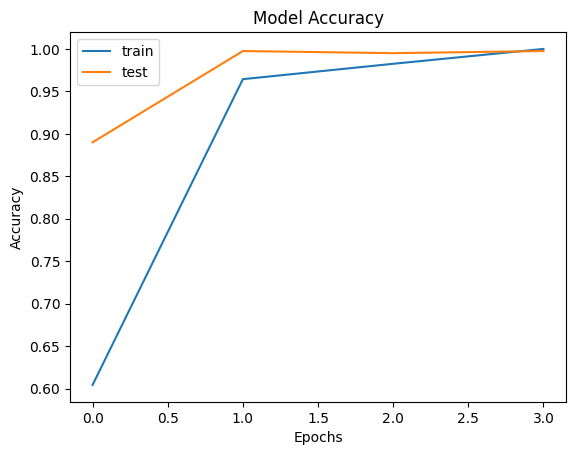

In [17]:
 #Plot training history
plt.plot(history_video.history['accuracy'])
plt.plot(history_video.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

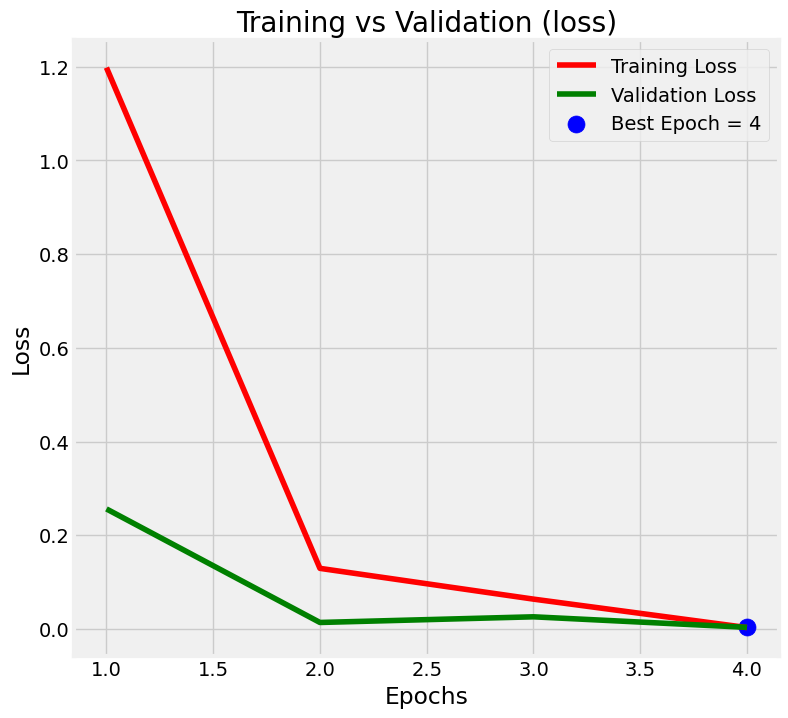

In [18]:
train_acc = history_video.history['accuracy']
train_loss = history_video.history['loss']

val_acc = history_video.history['val_accuracy']
val_loss = history_video.history['val_loss']

index_loss = np.argmin(val_loss)
index_acc = np.argmax(val_acc)

val_lowest = val_loss[index_loss]
val_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(train_acc))]

loss_label = f'Best Epoch = {str(index_loss + 1)}'
acc_label = f'Best Epoch = {str(index_acc + 1)}'

plt.figure(figsize= (20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(Epochs , train_loss , 'r', label = 'Training Loss')
plt.plot(Epochs , val_loss , 'g' , label = 'Validation Loss')
plt.scatter(index_loss +1 , val_lowest , s = 150 , c = 'blue' , label = loss_label)
plt.title('Training vs Validation (loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.tight_layout
plt.show();



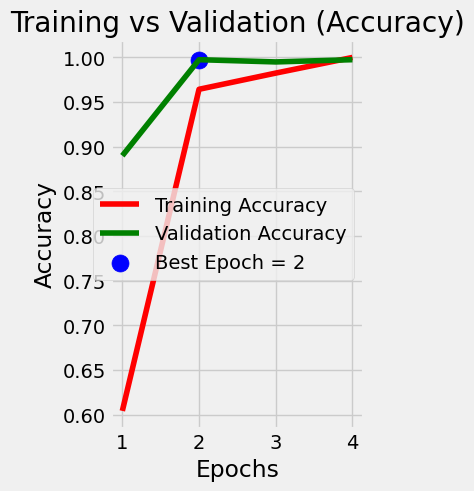

In [19]:
plt.subplot(1,2,2)
plt.plot(Epochs , train_acc , 'r', label= 'Training Accuracy')
plt.plot(Epochs , val_acc , 'g' , label = 'Validation Accuracy')
plt.scatter(index_acc + 1 , val_highest , s= 150 , c = 'blue' , label= acc_label)
plt.title('Training vs Validation (Accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show();

In [20]:
# Evaluate model on test data
test_loss, test_accuracy = video_model.evaluate(X_test_video, y_test_video)
print('Test accuracy: {:2.2f}%'.format(test_accuracy * 100))


13/13 [==============================] - 0s 20ms/step - loss: 0.0033 - accuracy: 0.9975
Test accuracy: 99.75%
